In [ ]:
!apt-get -y install libopenjp2-7-dev libopenjp2-tools openslide-tools | tail --line 1
!pip install tiatoolbox seaborn | tail -n 1
ON_GPU=False
print('Installation is done.')
!pip install torch==1.9.1+cu102 torchvision==0.10.1+cu102 -f https://download.pytorch.org/whl/cu102/torch_stable.html --user
ON_GPU = True 
!pip install seaborn
!pip install Pillow==9.0.0
!pip install validators matplotlib
!pip install torch-summary
!pip uninstall matplotlib
!pip install matplotlib==3.1.3
!pip install captum`
!pip install segmentation_models_pytorch
!pip install torchmetrics

0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


Installation is done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/cu102/torch_stable.html
  Using cached https://download.pytorch.org/whl/cu102/torch-1.9.1%2Bcu102-cp37-cp37m-linux_x86_64.whl (831.4 MB)
  Using cached https://download.pytorch.org/whl/cu102/torchvision-0.10.1%2Bcu102-cp37-cp37m-linux_x86_64.whl (22.1 MB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.13.1 requires torch==1.12.1, but you have torch 1.9.1+cu102 which is incompatible.
torchaudio 0.12.1+cu113 requires torch==1.12.1, but you have torch 1.9.1+cu102 which is incompatible.
tiatoolbox 1.2.1 requires torch>=1.11.0, but you have torch 1.9.1+cu102 which is inc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Found existing installation: matplotlib 3.5.3
Uninstalling matplotlib-3.5.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.3-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.5.3
Looking in indexes: https://pypi.org/simple, https://us-

/bin/bash: -c: line 0: unexpected EOF while looking for matching ``'
/bin/bash: -c: line 1: syntax error: unexpected end of file
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
import tables
import cv2
from PIL import Image
from random import randint 
import torchvision
import tables as pt
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.transforms.functional as F
import torch.nn.functional as P
import random
import albumentations as A
import sys
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt 
import numpy as np
from tiatoolbox.tools import patchextraction
import time
import os
import copy
from sklearn.metrics import cohen_kappa_score,precision_score, recall_score, f1_score, multilabel_confusion_matrix, confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns 
import warnings
from torchmetrics import JaccardIndex
warnings.filterwarnings('ignore')
import pickle
import PIL 
from torchsummary import summary
from tiatoolbox.models.engine.semantic_segmentor import (
    IOSegmentorConfig,
    SemanticSegmentor,
)
import math
from tqdm import tqdm
from torchmetrics.functional import jaccard_index

from matplotlib.colors import LinearSegmentedColormap
from google.colab.patches import cv2_imshow
from skimage.morphology import reconstruction
from tiatoolbox.tools.tissuemask import MorphologicalMasker
plt.style.use('seaborn')
import segmentation_models_pytorch as smp
from segmentation_models_pytorch.encoders import get_preprocessing_fn
from torchvision.transforms.transforms import ToPILImage
from albumentations.pytorch.transforms import ToTensorV2

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    #inp = std * inp + mean
    #inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

In [ ]:
!unzip "/content/gdrive/MyDrive/newstainnormed.zip" -d "/content"


Archive:  /content/gdrive/MyDrive/newstainnormed.zip
   creating: /content/stain_normed_3/
  inflating: /content/stain_normed_3/2.jpg  
  inflating: /content/stain_normed_3/1.jpg  
  inflating: /content/stain_normed_3/3.jpg  
  inflating: /content/stain_normed_3/4.jpg  


In [ ]:
!unzip "/content/gdrive/MyDrive/stain_normed.zip" -d "/content"


Archive:  /content/gdrive/MyDrive/stain_normed.zip
replace /content/stain_normed/8.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/stain_normed/8.jpg  
  inflating: /content/stain_normed/4.jpg  
  inflating: /content/stain_normed/5.jpg  
  inflating: /content/stain_normed/7.jpg  
  inflating: /content/stain_normed/6.jpg  
  inflating: /content/stain_normed/2.jpg  
  inflating: /content/stain_normed/3.jpg  
  inflating: /content/stain_normed/1.jpg  


In [ ]:

UHCW_strings = list()

UHCW_directory = '/content/stain_normed_3/'


In [ ]:
UHCW_directory = '/content/roi_folder_3/'
UHCW_strings = list()

gpuid = 0


In [ ]:
for image_string in os.listdir(UHCW_directory):
    UHCW_strings.append(os.path.join(UHCW_directory+image_string))


In [ ]:
UHCW_strings

['/content/stain_normed_3/4.jpg',
 '/content/stain_normed_3/2.jpg',
 '/content/stain_normed_3/3.jpg',
 '/content/stain_normed_3/1.jpg']

In [ ]:
def create_tumour_boundary_masks(masks):
  new_masks = list()
  for mask in masks:
    this_mask = mask.numpy().copy()
    
    
    np.putmask(this_mask, this_mask == 0, 0)
    np.putmask(this_mask, this_mask == 255, 0)
    np.putmask(this_mask, this_mask == 1, 255)
    np.putmask(this_mask, this_mask == 2, 0)
    new_masks.append(this_mask)
  return new_masks 

In [ ]:
def create_dilated_tumour_mask(segmentation_map):
  kernel = np.ones((5,5),np.uint8)

  boundary_image = np.array(create_tumour_boundary_masks(segmentation_map),dtype =np.uint8 )
  dilation = cv2.dilate(boundary_image,kernel,iterations = 10)
  dilation = np.array(dilation,dtype=np.uint8)
  contours, hierarchy = cv2.findContours(dilation, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
  mask = np.zeros(dilation.shape,np.uint8)
  for contour in contours:
    convexHull = cv2.convexHull(contour)
    cv2.drawContours(mask, [convexHull], -1, (255, 255, 255), -1)
  return mask

In [ ]:
def create_post_process_mask(segmentation_map):
    tumour_region_mask = create_dilated_tumour_mask(segmentation_map)
    mask = segmentation_map
    this_mask = np.zeros((mask.shape[0], mask.shape[1]),dtype=np.uint8)

    for i in range(len(mask)):
      for j in range(len(mask[0])):
        if mask[i][j] == 0:
          this_mask[i][j] = 0
        elif mask[i][j] == 1:
          this_mask[i][j] = 1
        elif mask[i][j] == 2:
          if tumour_region_mask[i][j]==255:
            this_mask[i][j] = 2
          else:
            this_mask[i][j] = 3
    return this_mask 


In [ ]:
def get_padding(image):
    height = image.shape[0]
    width = image.shape[1]
    height_padding = height % 16
    width_padding = width % 16
    
    if (height_padding!=0):
      height_padding = 16 - height_padding 
    if (width_padding!=0):
      width_padding = 16 - width_padding 

    top_padding = math.ceil(height_padding/2)
    bottom_padding = math.floor(height_padding/2)

    right_padding =math.ceil(width_padding/2)


    left_padding = math.floor(width_padding/2)
    
    padding = (int(top_padding), int(bottom_padding), int(left_padding), int(right_padding))
    
    return padding



def sort_data(file_loc_data ,directory):
  test_X_data = list()
 
  # Sort validation data 
  for i in range(len(file_loc_data)):
    # We need to sort if the image is large or not
    io=cv2.cvtColor(cv2.imread(file_loc_data[i]),cv2.COLOR_BGR2RGB)
    count = 0 
    interp_method=PIL.Image.BICUBIC
    io = cv2.resize(io,(0,0),fx=1,fy=1, interpolation=interp_method) #resize it as specified above
  
    all_padding = get_padding(io)
    
    io = np.pad(io, pad_width=((all_padding[0], all_padding[1]), (all_padding[2], all_padding[3]),(0,0)))
    print(io.shape)

    
    test_X_data.append(io)

  return test_X_data



class UHCW_seg_test(Dataset):
  def __init__(self, transform=None):
    self.x = np.array(UHCW_images)
    self.n_samples =  self.x.shape[0]
    self.transform = transform

  def __getitem__(self,index):
    image = self.x[index]
    if self.transform is not None :
      image = self.transform(image)

    return image

  def __len__(self):
    return self.n_samples


transform_UHCW = transforms.Compose([
     #transforms.ToPILImage(),
     transforms.ToTensor()
    ])

def compose_masks (dataloader, model):
  progress = tqdm(dataloader)  
  model.eval()
  all_predictions = list()
  
  for batch_idx, (data) in enumerate(progress):
    
    data = data.type(torch.FloatTensor)
    X = data.to(device)
    
    with torch.no_grad():
       predictions = model(X)
       # Create 4d from prediction
       p=predictions[:,:,:,:].detach().cpu()
       cpred=np.argmax(p,axis=1)
       all_predictions.append(cpred)
    
  return all_predictions

In [ ]:
def create_example(mask):
    mask_shape = mask.shape
    print(mask.shape)
    this_mask = np.zeros((mask_shape[0], mask_shape[1],3),dtype=np.uint8)
    for i in range(len(mask)):
      for j in range(len(mask[0])):
        if mask[i][j] == 0:
          this_mask[i][j] = [255,255,255]
        elif mask[i][j] == 1:
          this_mask[i][j] = [0,64,128]
        elif mask[i][j] == 2:
          this_mask[i][j] = [64,128,0]
        elif mask[i][j] == 3:
          this_mask[i][j] = [243,152,0]
    
    return Image.fromarray(this_mask)

In [ ]:
UHCW_images = sort_data(UHCW_strings, UHCW_directory)


(2464, 2512, 3)
(2496, 2496, 3)
(2512, 2496, 3)
(2512, 2528, 3)


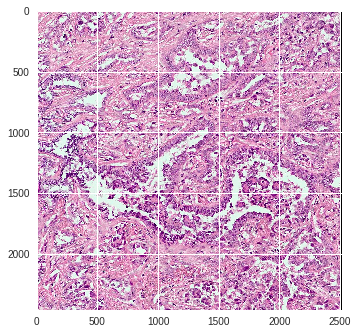

In [ ]:
plt.imshow(UHCW_images[0])

In [ ]:
model = smp.DeepLabV3Plus(
    encoder_name="resnet50",        # choose encoder, e.g. mobilenet_v2 or efficientnet-b7
    encoder_weights=None,     # use `imagenet` pre-trained weights for encoder initialization
    in_channels=3,                  # model input channels (1 for gray-scale images, 3 for RGB, etc.)
    classes=3,                      # model output channels (number of classes in your dataset)
).to(device)



model.load_state_dict(torch.load('/content/gdrive/MyDrive/deeplabplus_50_grid_other.pth')['model_state_dict'])

<All keys matched successfully>

In [ ]:
torch.cuda.empty_cache()


In [ ]:
all_masks = None

In [ ]:
model = None

In [ ]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
  process = psutil.Process(os.getpid())
  print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
  print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
  printm()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for gputil: filename=GPUtil-1.4.0-py3-none-any.whl size=7411 sha256=67c0046e7041ce2b56152c4a9fb868e5d12d6eba9aa6df3eca188f8a6223fe3f
  Stored in directory: /root/.cache/pip/wheels/6e/f8/83/534c52482d6da64622ddbf72cd93c35d2ef2881b78fd08ff0c
Successfully built gputil
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
segmentation_UHCW = UHCW_seg_test(transform_UHCW)

dataloader_segmentation_UHCW = DataLoader(dataset = segmentation_UHCW, batch_size = 1, shuffle = False)

In [ ]:
all_masks = None

In [ ]:
len(UHCW_images[6:7])

1

In [ ]:


all_masks = compose_masks(dataloader_segmentation_UHCW, model)

100%|██████████| 4/4 [00:03<00:00,  1.30it/s]


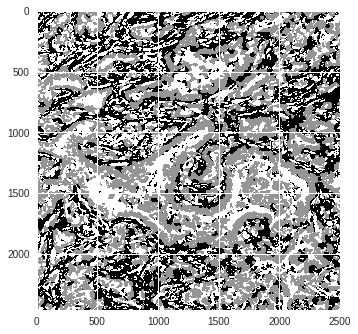

In [ ]:
plt.imshow(all_masks[0].reshape(2464, 2512))

In [ ]:
post_processed_test_images = list()
count = 0 
for pred in all_masks:
  count+=1
  print(count)
  post_processed_test_images.append(create_post_process_mask(pred[0]))

1
2
3
4


In [ ]:
def calculate_RCTN(image):
  image_uint8 = image.astype(np.uint8)
  r,threshold_tumour = cv2.threshold(image_uint8,0,1,cv2.THRESH_BINARY)
  num_tumour_labels, tumour_labels = cv2.connectedComponents(threshold_tumour)
  image_uint8_nontumnour = image_uint8.copy()
  image_uint8_nontumnour[image_uint8_nontumnour==1] = 0
  num_non_tumour_labels, non_tumour_labels = cv2.connectedComponents(image_uint8_nontumnour)
  print(num_non_tumour_labels)
  print(num_tumour_labels)
  return num_tumour_labels/num_non_tumour_labels


In [ ]:
def calculate_RTNA(image):
  tumour_count = np.count_nonzero(image == 1)
  non_tumour_count = np.sum(image > 1)
  return tumour_count/non_tumour_count


In [ ]:
RCTNS = list()
for image in post_processed_test_images:
  RCTNS.append(calculate_RCTN(image))

875
298
1190
309
980
408
1224
384


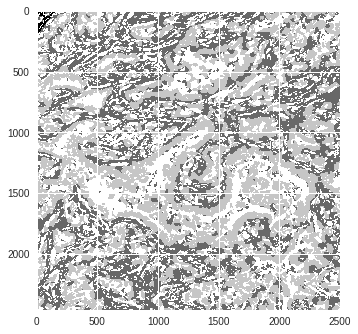

In [ ]:
plt.imshow(post_processed_test_images[0])

In [ ]:
RTNAs = list()
for image in post_processed_test_images:
  RTNAs.append(calculate_RTNA(image))

In [ ]:
RCTNS

[0.3405714285714286,
 0.2596638655462185,
 0.4163265306122449,
 0.3137254901960784]

In [ ]:
RCTNS[0]

0.3405714285714286

In [ ]:
RTNAs[0]

1.2965398697575528

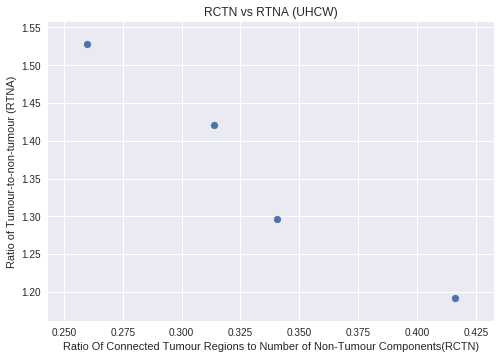

In [ ]:
plt.scatter(RCTNS,RTNAs)
plt.title("RCTN vs RTNA (UHCW)")
plt.xlabel("Ratio Of Connected Tumour Regions to Number of Non-Tumour Components(RCTN)")
plt.ylabel("Ratio of Tumour-to-non-tumour (RTNA)")
plt.show()

In [ ]:
from tiatoolbox.utils.visualization import overlay_prediction_mask
colour_dict = {0: ('background', np.array([255,255,255])),
               1: ('tumour',   np.array([0,64,128])),
               2: ('stroma',  np.array([64,128,0])),
               3: ('normal',  np.array([243,152,0]))
}

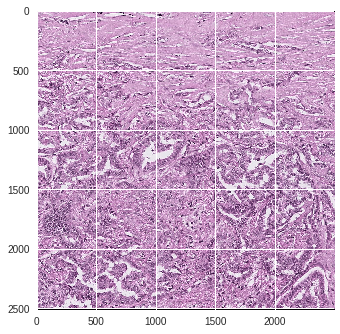

In [ ]:
plt.imshow(UHCW_images[2])

In [ ]:

for i in range(len(all_masks)):
  overlay = overlay_prediction_mask(
      UHCW_images[i], post_processed_test_images[i], alpha=0.5, label_info=colour_dict, return_ax = False
  )
  img = Image.fromarray(overlay)
  img.save('/content/gdrive/MyDrive/Grid_other_segments/stain_normed/'+str(i)+'.jpg', 'JPEG')


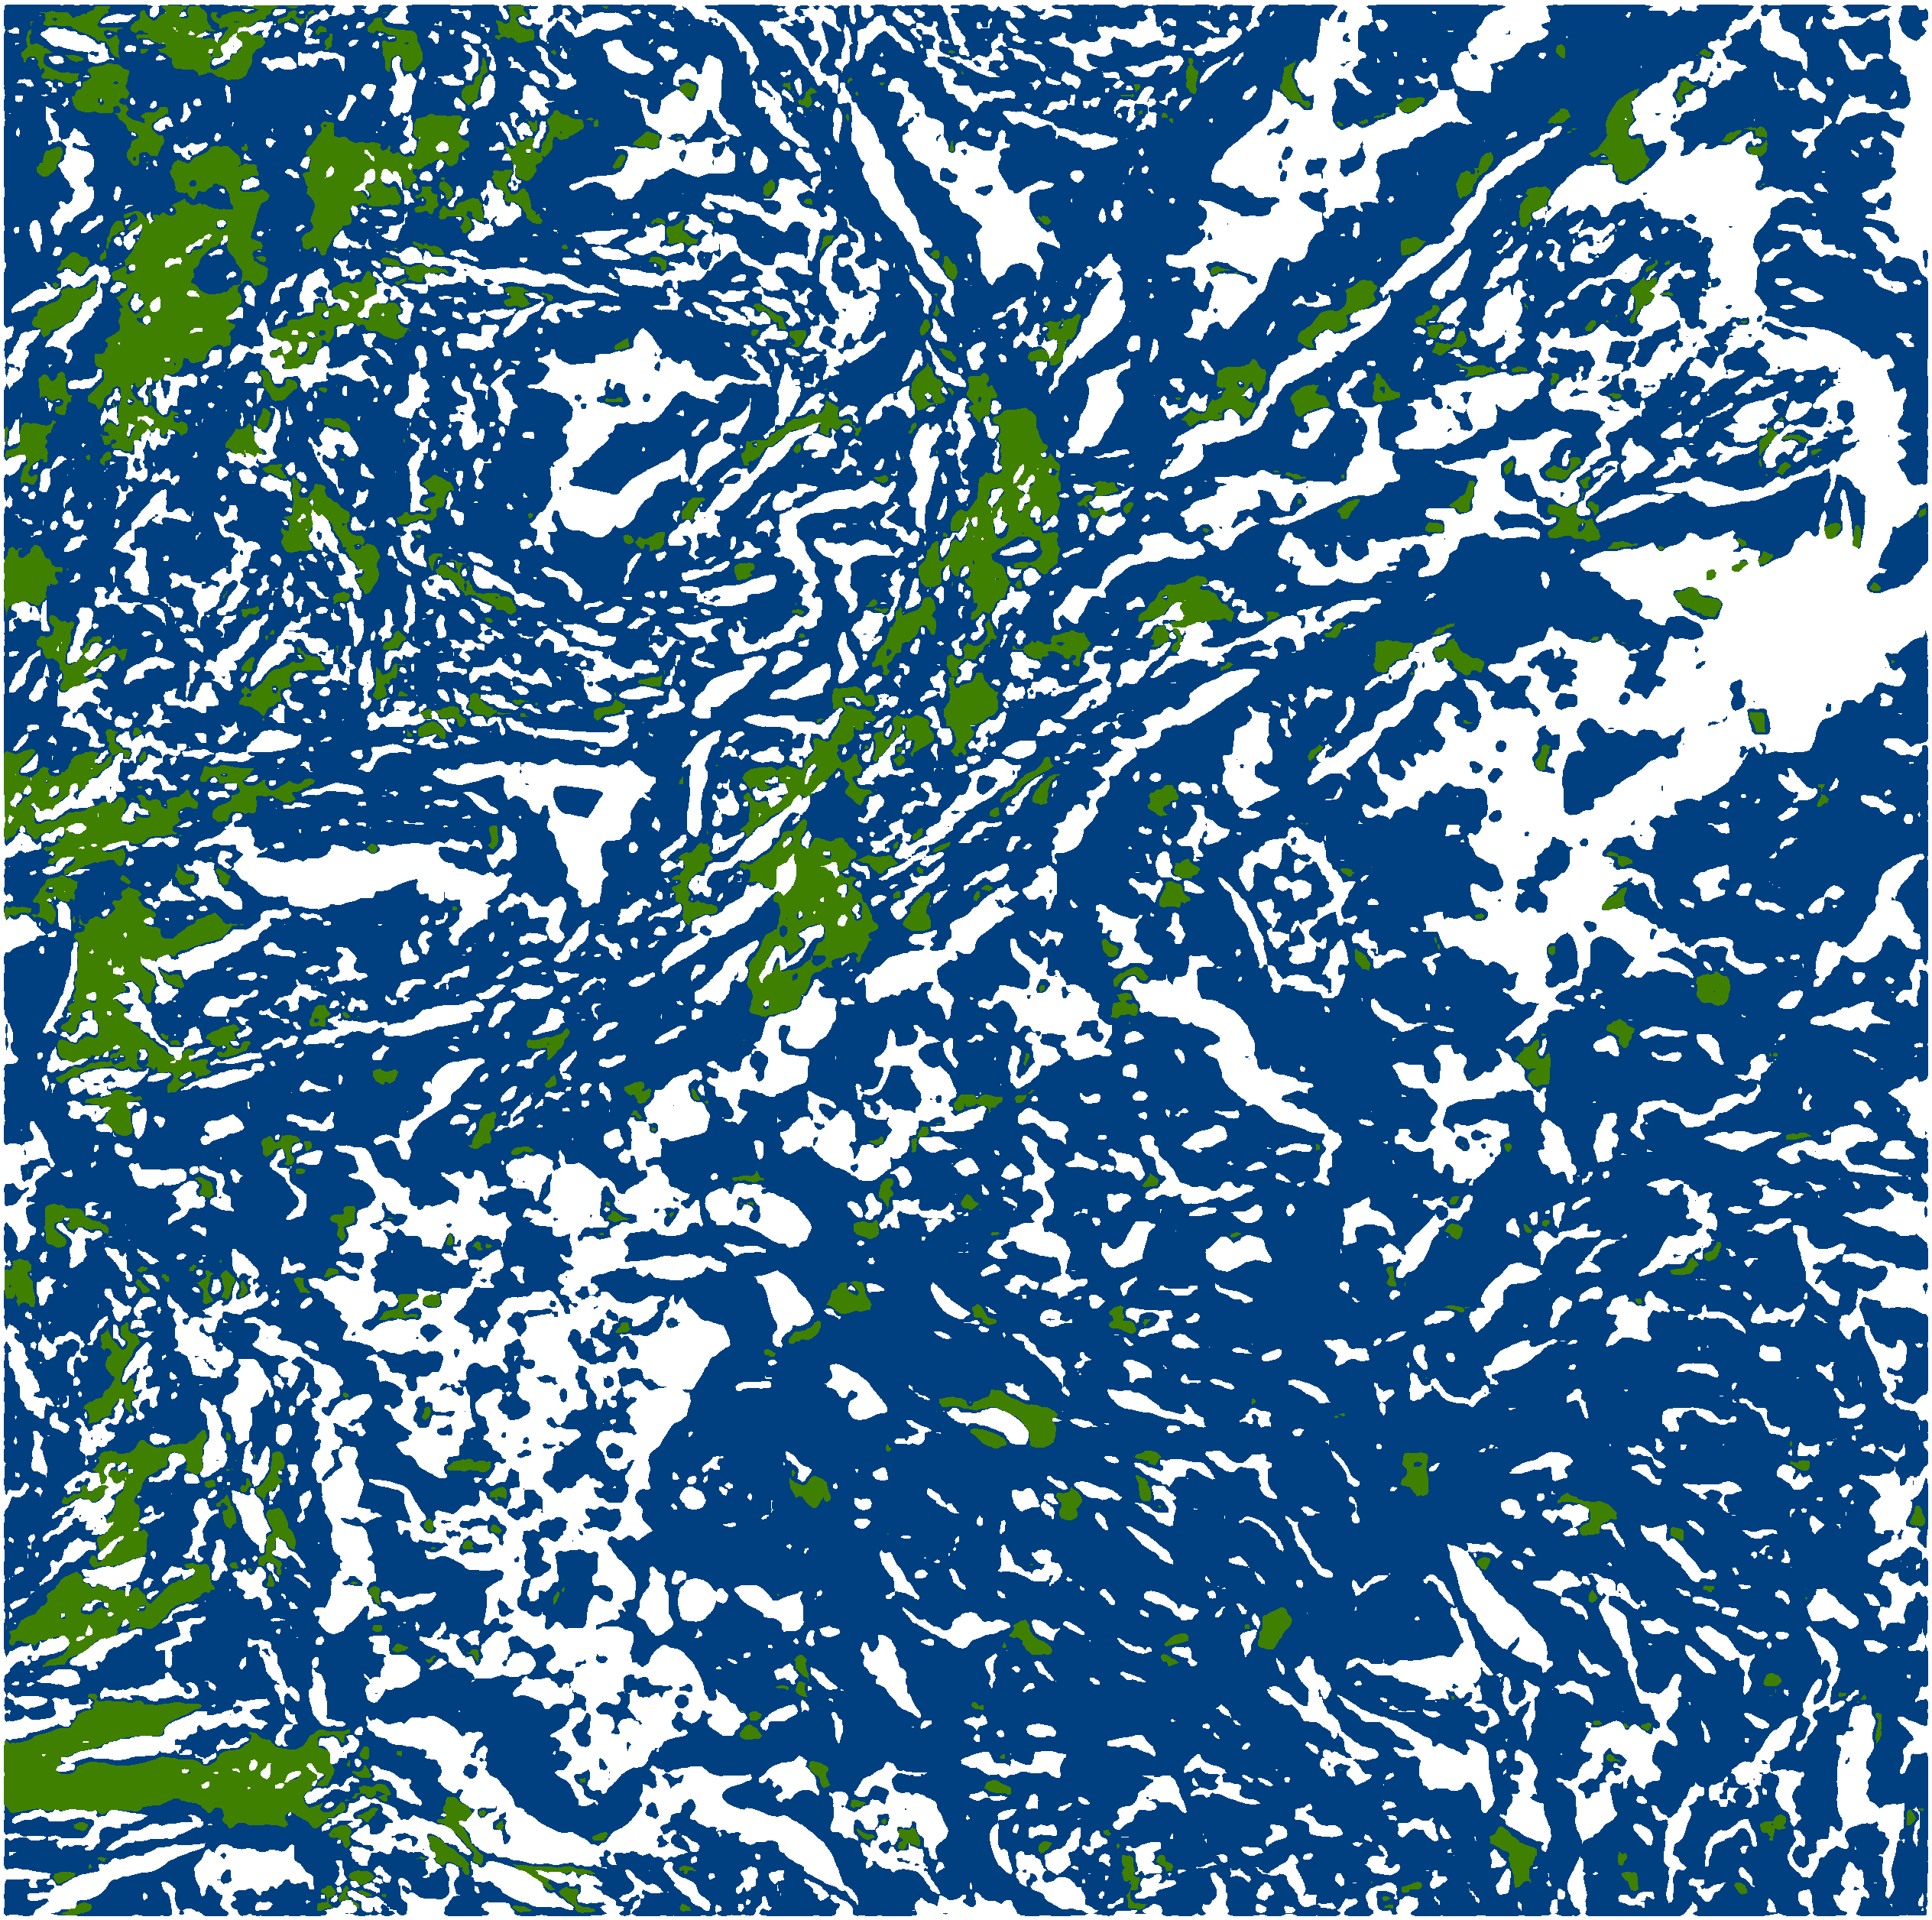

In [ ]:
Image.fromarray(overlay)